# Data Visualization

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [3]:
df_canada = pd.read_excel(
    "data/Canada.xlsx",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2
)

In [5]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

## Data Preprocessing

In [7]:
df_canada["Type"].value_counts()

Immigrants    195
Name: Type, dtype: int64

In [8]:
df_canada["Coverage"].value_counts()

Foreigners    194
Citizens        1
Name: Coverage, dtype: int64

In [9]:
# df_canada = df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"])
df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"], inplace=True)

In [10]:
df_canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
df_canada.rename(
    columns={
        "OdName": "Country",
        "AreaName": "Continent",
        "RegName": "Region",
        "DevName": "Dev"
    },
    inplace=True
)

In [13]:
df_canada.head()

,Country,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [18]:
df_canada["Total"] = df_canada.select_dtypes("number").sum(axis=1) 

In [22]:
df_canada.tail()

,Country,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,1677
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407,8598


In [23]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [24]:
df_canada.loc[[190, 194]]

,Country,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407,8598


In [25]:
df_canada.set_index("Country", inplace=True)

In [26]:
df_canada.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [27]:
df_canada.loc[["Algeria", "Indonesia"]]

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,213,270,260,227,252,243,278,262,205,231,166,165,525,1138,907,709,515,552,632,613,657,661,504,712,390,395,387,13150


### Visualizations

In [31]:
# plt.style.available
plt.style.use("fivethirtyeight")

### Line Plots

In [38]:
haiti = df_canada.loc["Haiti", range(1980, 2014)]

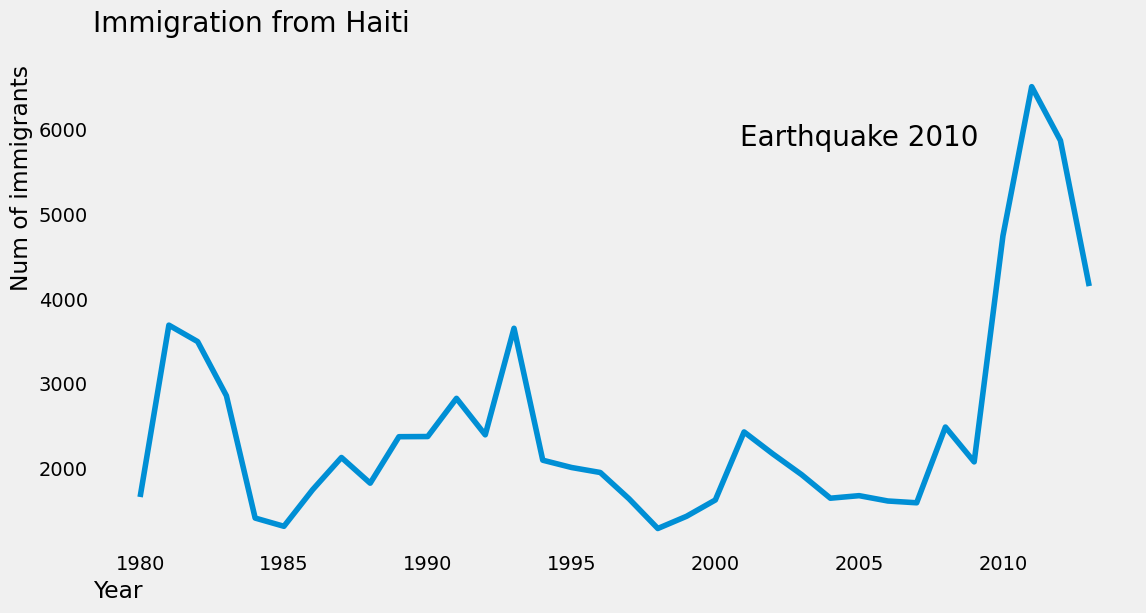

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(haiti.index, haiti.values)
plt.xlabel("Year", loc="left")
plt.ylabel("Num of immigrants", loc="top")
plt.title("Immigration from Haiti", loc="left", y=1.05)
plt.text(2005, 5800, "Earthquake 2010", horizontalalignment="center", fontsize=20)
plt.grid(False)
plt.show()

In [53]:
df_canada.loc[["India", "China"], range(1980, 2014)]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


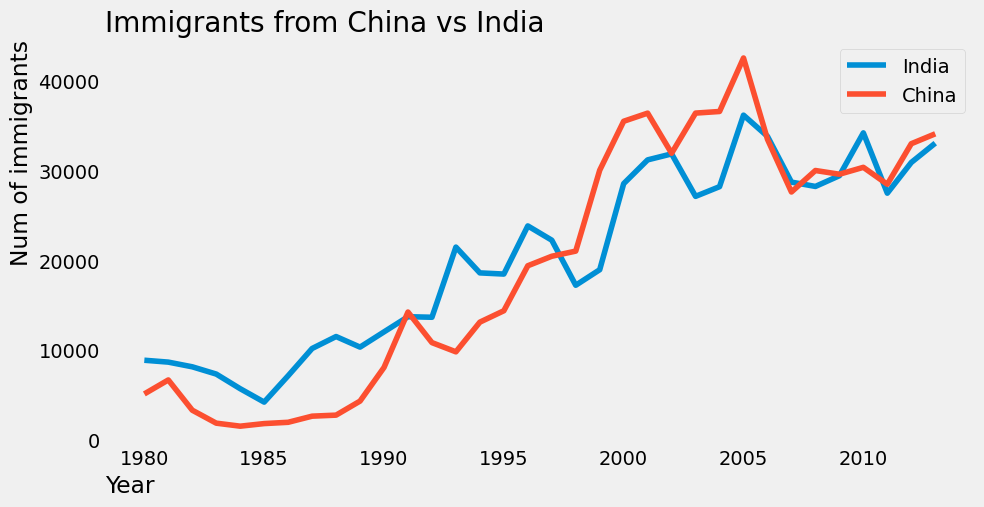

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(df_canada.loc["India", range(1980, 2014)], label="India")
plt.plot(df_canada.loc["China", range(1980, 2014)], label="China")
plt.xlabel("Year", loc="left")
plt.ylabel("Num of immigrants", loc="top")
plt.title("Immigrants from China vs India", loc="left")
plt.grid(False)
plt.legend()
plt.show()

In [69]:
top_5_countries = df_canada.sort_values("Total", ascending=False).head()
list_5_countries = top_5_countries.index.tolist()
print("Top 5 countries:", list_5_countries)

Top 5 countries: ['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan']


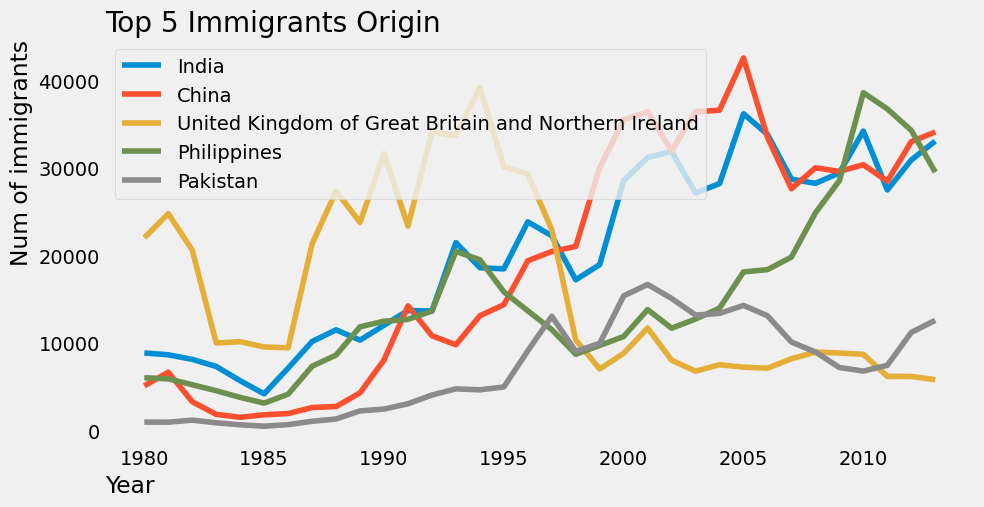

In [70]:
plt.figure(figsize=(10, 5))
for country in list_5_countries:
    plt.plot(df_canada.loc[country, range(1980, 2014)], label=country)
plt.xlabel("Year", loc="left")
plt.ylabel("Num of immigrants", loc="top")
plt.title("Top 5 Immigrants Origin", loc="left")
plt.grid(False)
plt.legend()
plt.show()

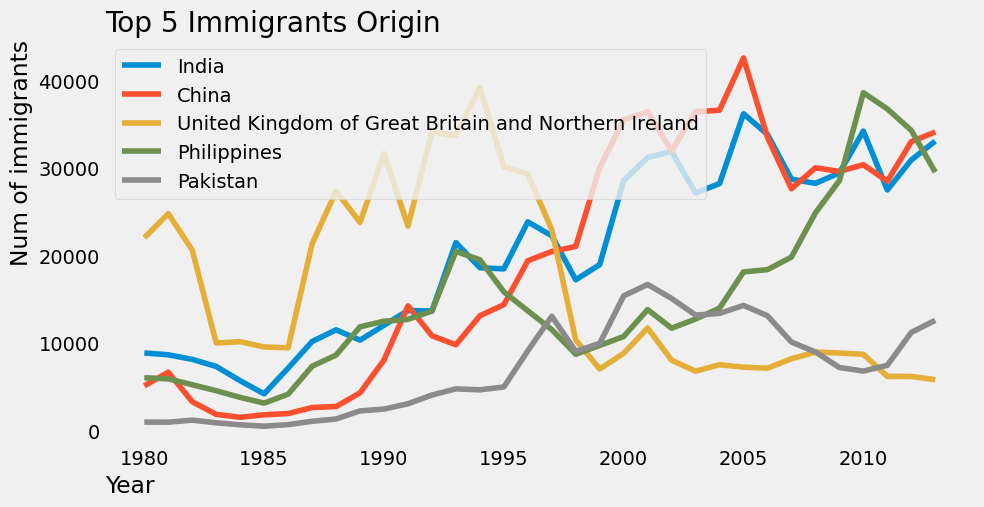

In [84]:
top_5_countries[range(1980, 2014)].transpose().plot(
    kind="line",
    figsize=(10, 5)
)
plt.xlabel("Year", loc="left")
plt.ylabel("Num of immigrants", loc="top")
plt.title("Top 5 Immigrants Origin", loc="left")
plt.grid(False)
plt.legend()
plt.show()

## Area Plot

In [73]:
top_5_countries[range(1980, 2014)]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [76]:
top_5_countries_transpose = top_5_countries[range(1980, 2014)].transpose()

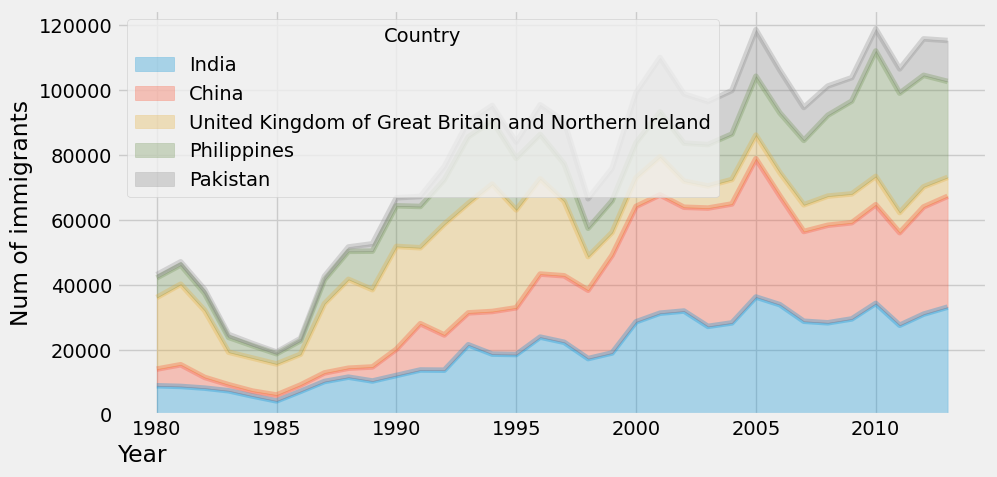

In [83]:
top_5_countries_transpose.plot(
    kind="area",
    alpha=.3,
    figsize=(10, 5)
)
plt.xlabel("Year", loc="left")
plt.ylabel("Num of immigrants")
# plt.grid(False)
plt.show()

### Histogram

In [85]:
df_canada[2013]

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64

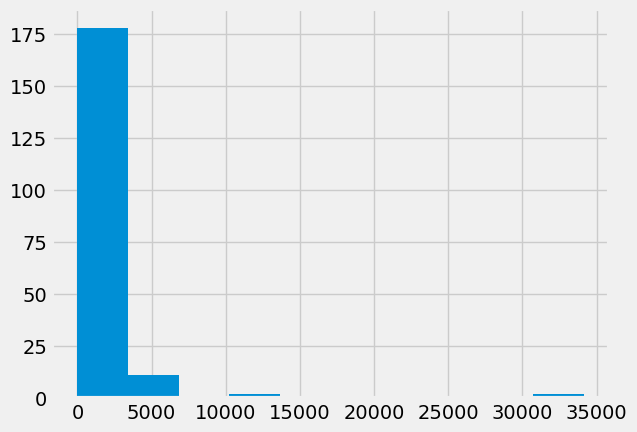

In [86]:
plt.hist(df_canada[2013])
plt.show()

In [89]:
count, bin_edges = np.histogram(df_canada[2013], bins=8)
print("count:", count)
print("bins:", bin_edges)

count: [184   6   2   0   0   0   1   2]
bins: [    0.     4266.125  8532.25  12798.375 17064.5   21330.625 25596.75
 29862.875 34129.   ]


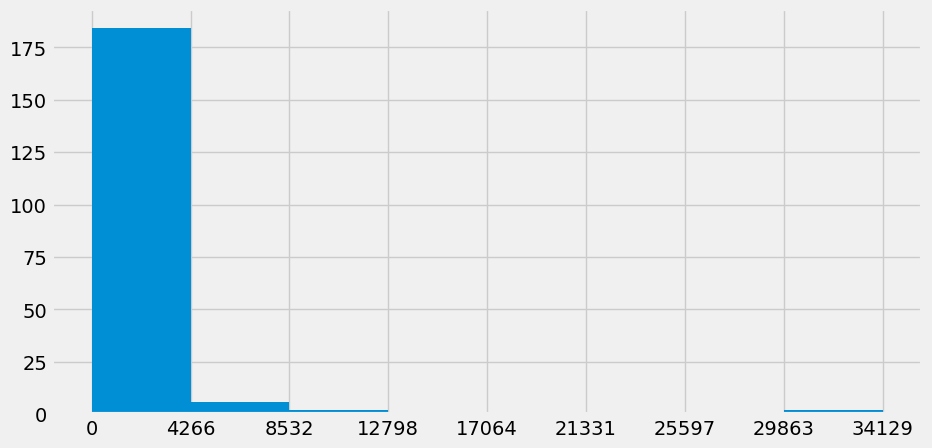

In [93]:
plt.figure(figsize=(10, 5))
plt.hist(df_canada[2013], bins=bin_edges)
plt.xticks(bin_edges)
plt.show()

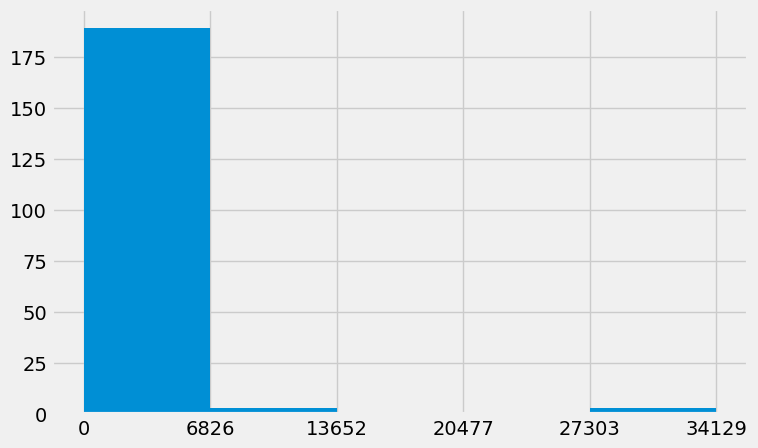

In [95]:
plt.figure(figsize=(8, 5))
count, bin_edges = np.histogram(df_canada[2013], bins=5)
plt.hist(df_canada[2013], bins=5)
plt.xticks(bin_edges)
plt.show()

In [96]:
df_countries = df_canada.loc[["Denmark", "Norway", "Sweden"], range(1980, 2014)].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


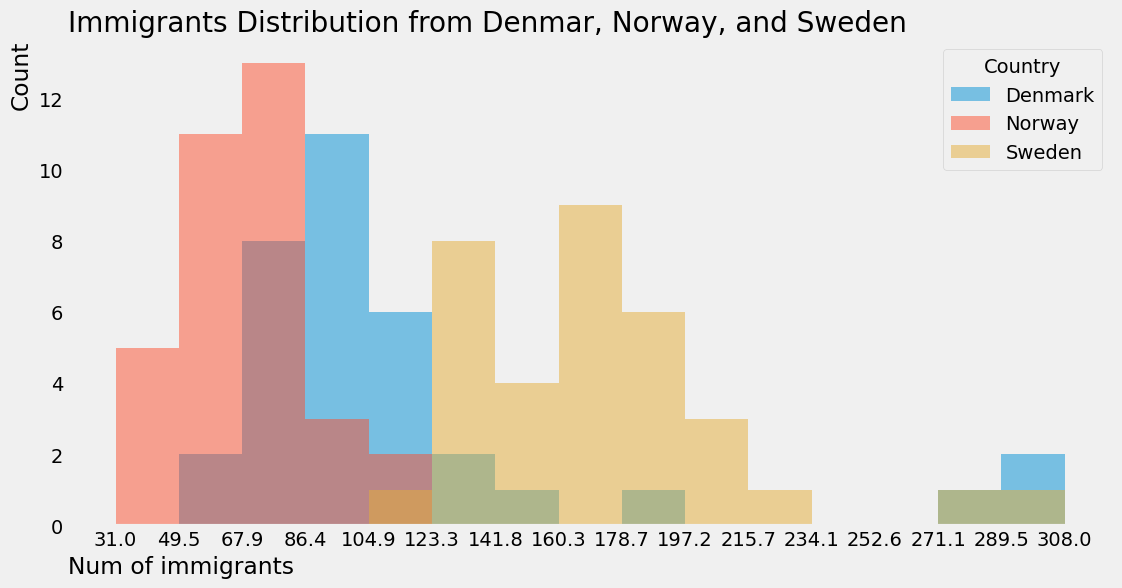

In [100]:
count, bin_edges = np.histogram(df_countries, bins=15)
ax = df_countries.plot(
    kind="hist",
    figsize=(12, 6),
    bins=15,
    alpha=.5,
    xticks=bin_edges
)
ax.set_title("Immigrants Distribution from Denmar, Norway, and Sweden", loc="left")
ax.set_xlabel("Num of immigrants", loc="left")
ax.set_ylabel("Count", loc="top")
ax.grid(False)
plt.show()

### Bar Plot

In [101]:
df_iceland = df_canada.loc["Iceland", range(1980, 2014)]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

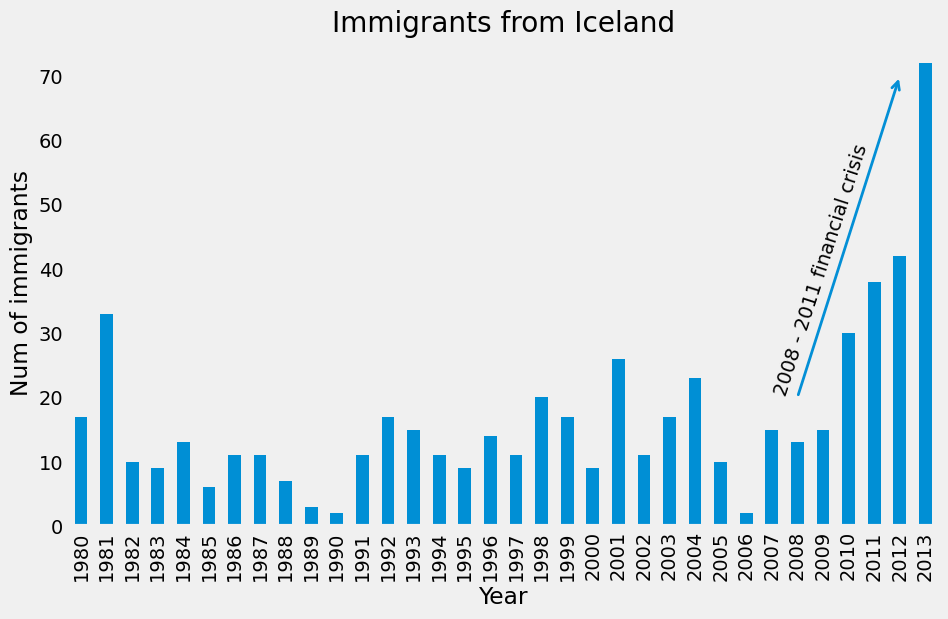

In [121]:
df_iceland.plot(
    kind="bar", figsize=(10, 6)
)

# annotate chart
plt.annotate(
    "",
    xy=(32, 70),
    xytext=(28, 20),
    xycoords="data",
    arrowprops={"arrowstyle": "->", "connectionstyle": "arc3", "lw": 2, "color": "#038FD6"}
)
plt.annotate(
    "2008 - 2011 financial crisis",
    xy=(27, 20),
    rotation=72,
    va="bottom",
    ha="left"
)

# chart configuration
plt.xlabel("Year")
plt.ylabel("Num of immigrants")
plt.title("Immigrants from Iceland")
plt.grid(False)
plt.show()

In [127]:
top_15_countries = df_canada.sort_values("Total", ascending=True) # sort values by Total
top_15_countries = top_15_countries["Total"].tail(15) # get top 15
top_15_countries

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

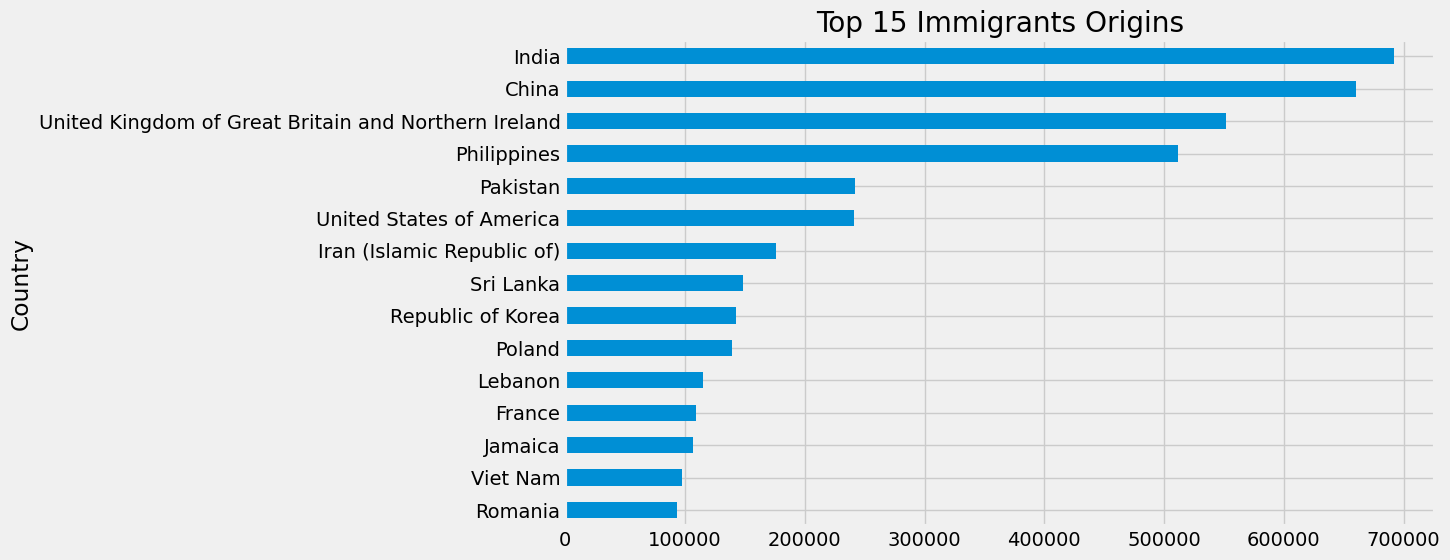

In [128]:
top_15_countries.plot(
    kind="barh",
    figsize=(10, 6)
)
plt.title("Top 15 Immigrants Origins")
plt.show()

### Box Plot

In [133]:
df_japan = df_canada.loc["Japan", range(1980, 2014)]
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

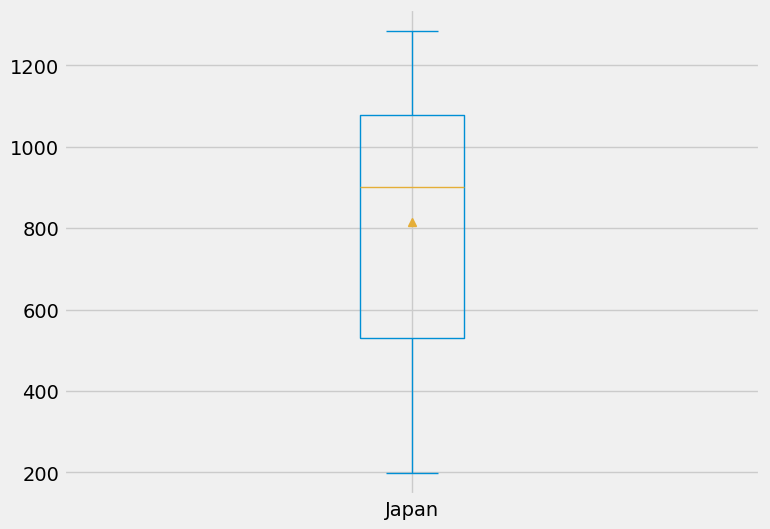

In [146]:
df_japan.plot(
    kind="box",
    figsize=(8, 6),
    showmeans=True
)
plt.show()

In [145]:
df_canada.loc[["Japan"], range(1980, 2014)].transpose().describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [149]:
df_china_india = df_canada.loc[["India", "China"], range(1980, 2014)].transpose()
df_china_india.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


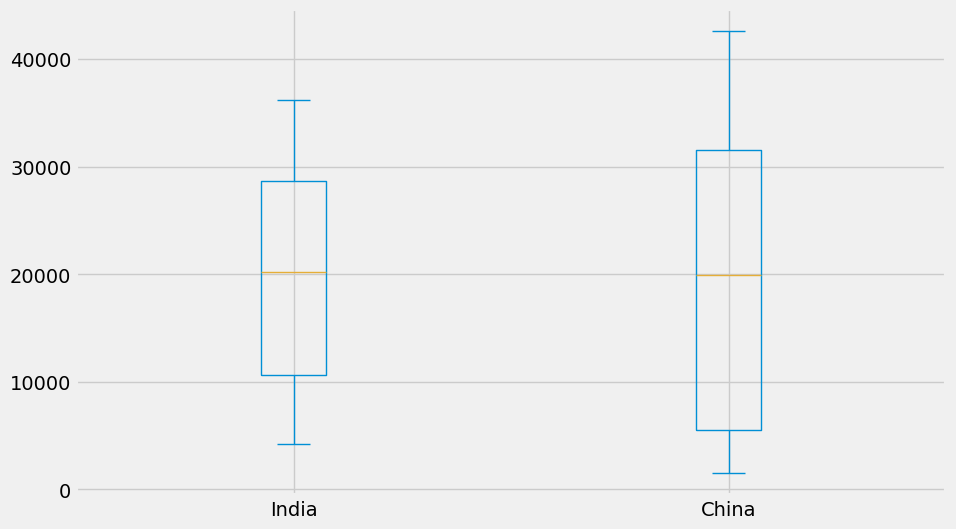

In [150]:
df_china_india.plot(
    kind="box",
    figsize=(10, 6)
)
plt.show()

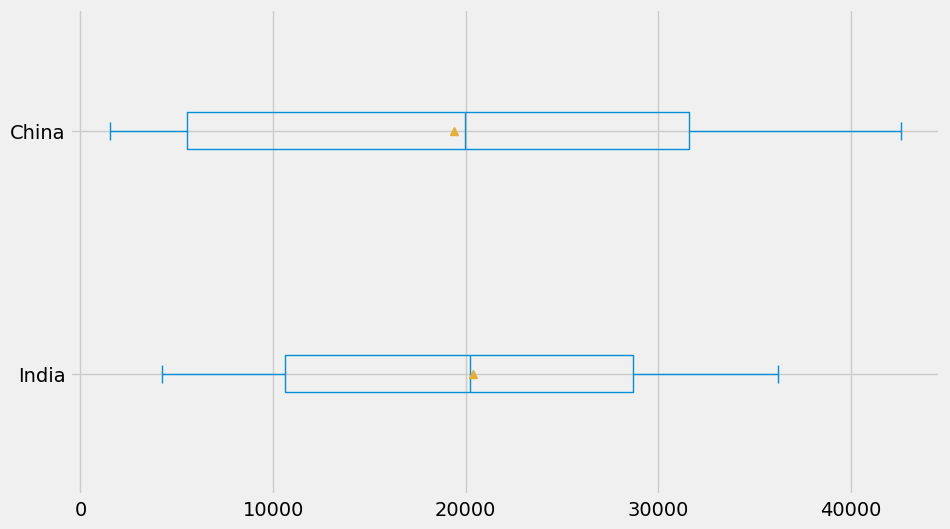

In [153]:
df_china_india.plot(
    kind="box",
    figsize=(10, 6),
    vert=False,
    color="#038FD6",
    showmeans=True
)
plt.show()